<a href="https://colab.research.google.com/github/MatthewFried/Udemy/blob/master/Day4_Example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Day4_Example1

#**Testing Data Metrics**#

We will evaluate the performance of classification models facilitated through a combination of calculating certain types of performance metrics and generating model performance evaluation graphics. We will be testing these performance metrics via Python code functions we design and then compare to results of those pre-built Python functions that automatically calculate those same metrics. You will also be creating graphical output via Python code that can be used to evaluate the performance of classification models alongside our analysis.

The data set we use for this work is comprised of 181 labeled binary observations. The classifications are either ‘0’ or ‘1’. 

A classification model has been used to “predict” the actual classifications for each observation, and its algorithm works by estimating the probability that the correct classification for each observation is a ‘1’. The data set includes three attributes that we will make use of for our analysis:

1.  **class**: the actual classification for the observation
2.  **scored.class**: the predicted classification for the observation (can only be ‘0’ or ‘1’; identified by comparing the classification model’s probability score (i.e., the likelihood that the correct classification
3.  **scored.probability**: the classification model’s probability score (i.e., the likelihood that the correct classification for an observation is a ‘1’) for the observation

In our analysis we will create a confusion matrix and compare our results against the regular Python functions.

In [ ]:
# load all libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from yellowbrick.classifier import ROCAUC


df = pd.read_csv("https://raw.githubusercontent.com/MatthewFried/Udemy/master/Day4/Day4%20Data.csv")

#create a second stored value of original data as a safety
df_orignal = df

# check the dataset uploaded as expected
print("Observations: {}".format(df.shape[0]))
df.head()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Observations: 181


,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660
3,1,91,64,24,0,29.2,0.192,21,0,0,0.055998
4,4,83,86,19,0,29.3,0.317,34,0,0,0.100491


In [ ]:
#check how many data points there are
len(df)

181

In [ ]:
#check that there is no null data that we would need to clean first
df.isnull().sum()

pregnant              0
glucose               0
diastolic             0
skinfold              0
insulin               0
bmi                   0
pedigree              0
age                   0
class                 0
scored.class          0
scored.probability    0
dtype: int64

##**Confusion Matrix**##

Here we create our confusion matrix and study the different, relevant points. We have four sections in the confusion matrix:

1. **True Positives** (TP): True positives are the cases when the actual class of the data point was 1(True) and the predicted is also 1(True)
2. **True Negatives** (TN): True negatives are the cases when the actual class of the data point was 0(False) and the predicted is also 0(False)
3. **False Positives** (FP): False positives are the cases when the actual class of the data point was 0(False) and the predicted is 1(True). False is because the model has predicted incorrectly and positive because the class predicted was a positive one.
4. **False Negatives** (FN): False negatives are the cases when the actual class of the data point was 1(True) and the predicted is 0(False). False is because the model has predicted incorrectly and negative because the class predicted was a negative one.

We would like to investigate this data to minimize false positives and false negatives.  To this end we will look at the metrics defined below: accuracy, precision, recall, and f1.  

In [ ]:
y_predict = df['scored.class']
y_test = df['class'] 

pd.DataFrame(confusion_matrix(y_test, y_predict), columns=["Predict 0","Predict 1",],index=["True 0", "True 1"])

,Predict 0,Predict 1
True 0,119,5
True 1,30,27


In [ ]:
#cross tab
pd.crosstab(y_test,y_predict,margins=True, margins_name="Total",dropna=False)

scored.class,0,1,Total
class,,,
0,119,5,124
1,30,27,57
Total,149,32,181


In [ ]:
#Look at y_predict value counts
y_predict.value_counts()

0    149
1     32
Name: scored.class, dtype: int64

In [ ]:
#Look at y_test value counts
y_test.value_counts()

0    124
1     57
Name: class, dtype: int64

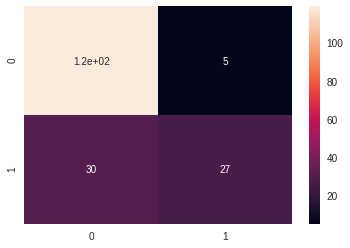

In [ ]:
#picture of cofusion matrix with seaborn
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [ ]:
#normalized cross tab
pd.crosstab(y_test,y_predict,normalize=True)

scored.class,0,1
class,,
0,0.657459,0.027624
1,0.165746,0.149171


In [ ]:
#checking the value counts with 10 bins
df['scored.probability'].value_counts(sort=True, bins=10)

(0.0213, 0.116]    44
(0.116, 0.208]     39
(0.208, 0.3]       24
(0.3, 0.392]       21
(0.392, 0.485]     17
(0.485, 0.577]      9
(0.669, 0.762]      8
(0.577, 0.669]      8
(0.854, 0.946]      6
(0.762, 0.854]      5
Name: scored.probability, dtype: int64

In [ ]:
#scored.probability with 2 bins
df['scored.probability'].value_counts(sort=True, bins=2)

(0.0213, 0.485]    145
(0.485, 0.946]      36
Name: scored.probability, dtype: int64

The above value counts were binned. 

##**Metrics**##

Here we create the relevant metrics.
* **Accuracy** is the most intuitive performance measure.  It is a ratio of correctly predicted observation to the total observations. Accuracy is a great measure when you have symmetric datasets where values of false positive and false negatives are almost same.
  * TP+TN/TP+FP+FN+TN
* **Precision** is the ratio of correctly predicted positive observations to the total predicted positive observations.
 * TP/TP+FP
* **Recall** (or sensitivity) is the ratio of correctly predicted positive observations to the all observations.
 * TP/TP+FN
* **F1** Score is the weighted average of Precision and Recall. This score takes both false positives and false negatives into account. F1 is usually more useful than accuracy, especially if you have an uneven class distribution.  If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall rather than Accuracy.
 * 2*(Recall * Precision) / (Recall + Precision)


In [ ]:
#scores
accuracy = accuracy_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

In [ ]:
#function list

#create a function to get our necessary values
def confusion_matrix_values(y_predict, y_test):
  tp = ((y_test == 1) & (y_test == y_predict)).sum()  
  tn = ((y_test == 0) & (y_test == y_predict)).sum() 
  fp = ((y_test == 0) & (y_test != y_predict)).sum()  
  fn = ((y_test == 1) & (y_test != y_predict)).sum()  
  return tp, tn, fp, fn 

#function for accuracy
def func_accuracy(actual, predicted):
  tp, tn, fp, fn = confusion_matrix_values(y_predict, y_test)
  val = (tp + tn) / (tp + tn + fp + fn)
  return val

#function for recall
def func_recall(y_predict,y_test):
  tp, tn, fp, fn = confusion_matrix_values(y_predict, y_test)
  val = tp / (tp + fn)
  return val

#function for precision
def func_precision(y_predict, y_test):
  tp, tn, fp, fn = confusion_matrix_values(y_predict, y_test)
  val = tp / (tp + fp)
  return val

#function for specificity
def func_specificity(y_predict, y_test):
 tp, tn, fp, fn = confusion_matrix_values(y_predict, y_test)
 return (tn/(tn+fp))

#function for f1
def func_f1(y_predict,y_test):
  tp, tn, fp, fn = confusion_matrix_values(y_predict, y_test)
  pre = tp / (tp + fp)
  rec = tp / (tp + fn)
  val = (2 * pre * rec) / (pre + rec)
  return val

#function to get the stats of all of them
def get_stats(x,y):
  acc = func_accuracy(x,y)
  rec = func_recall(x,y)
  pre = func_precision(x,y)
  spe = func_specificity(x,y)
  f1 = func_f1(x,y)
  return acc, rec, pre, spe, f1

a, b, c, d, e = get_stats(y_predict, y_test,)

#output of comparison
print('Accuracy:\n',a,'\n',accuracy,'\n')
print('Recall:\n',b,'\n',recall,'\n')
print('Precision:\n',c,'\n',precision,'\n')
print('F1:\n',e,'\n',f1,'\n')
print('Specificity:\n',d,'\n')


Accuracy:
 0.8066298342541437 
 0.8066298342541437 

Recall:
 0.47368421052631576 
 0.47368421052631576 

Precision:
 0.84375 
 0.84375 

F1:
 0.6067415730337079 
 0.6067415730337079 

Specificity:
 0.9596774193548387 



In [ ]:
#classification report
print(classification_report(y_test,y_predict,digits=7))

              precision    recall  f1-score   support

           0  0.7986577 0.9596774 0.8717949       124
           1  0.8437500 0.4736842 0.6067416        57

    accuracy                      0.8066298       181
   macro avg  0.8212039 0.7166808 0.7392682       181
weighted avg  0.8128580 0.8066298 0.7883250       181



##**ROC and AUC**##

Here we create our ROC (Receiver Operating Characteristic) and AUC (Area Under the Curve) statistics. The ROC chart provides a means of comparison between classification models. The ROC chart shows false positive rate (1-specificity) on the X-axis, the probability of target=1 when its true value is 0, against true positive rate (sensitivity) on Y-axis, the probability of target=1 when its true value is 1. Ideally, the curve will climb quickly toward the top-left meaning the model correctly predicted the cases.  We use the built in Python functions to do this. (I tried doing this myself (without using the libraries), but I do not understand how to do get a list, I was only getting out two numbers - fpr, tpr.)

In [ ]:
#roc function in Python
y_prob = df['scored.probability']

r_probs = [0 for _ in range(len(y_test))]
real_auc = roc_auc_score(y_test,y_prob)
fake_auc = roc_auc_score(y_test, r_probs)

print('Our data = %.5f' % (real_auc))
print('Random data = %.5f' % (fake_auc))

Our data = 0.85031
Random data = 0.50000


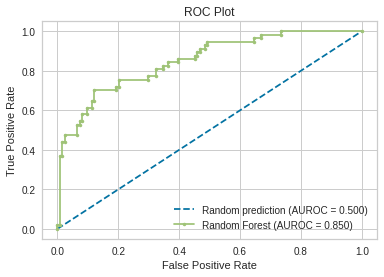

In [ ]:
fake_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
real_fpr, rf_tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fake_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % fake_auc)
plt.plot(real_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % real_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

#**Summary**#

We have a large area under the curve, rising rapidly, as described above. Our general plan and process output the same numbers as the Python libraries as well. Overall, the model seems to have a swift pick up and hits 1 at around .8.